# Measuring Park Capacity

---
### Getting the data
First, the data is imported, read, and previewed. Unnecessary data will be stripped and any NaN values will be disregarded later on.

In [6]:
import pandas as pd

df = pd.read_csv("park_features.csv")
df = df[["center", "feature_name", "capacity"]]

df.sample(10)

,center,feature_name,capacity
67,North Park,Ambridge,40.0
242,South Park,Monroe,40.0
18,Boyce Park,Pack,50.0
42,North Park,Parish Hill,150.0
8,Boyce Park,Soccer Pavilion,50.0
504,Deer Lakes Park,Workout Station,NaN
184,South Park,Fairgrounds Building 3,70.0
345,North Park,Nature Center Barn,NaN
503,Deer Lakes Park,Workout Station,NaN
193,South Park,100 Acre Field,40.0


Now, we have a dataframe of name 'df' that contains only the park name, feature name, and feature capacity. This stripped down the data from the original imported csv file to only what is necessary in analyzing the capacities for each park.

---
### Analyzing the data
Next, an empty string will be made to be filled with all unique parks. A for loop is used to go through each row of the dataframe and grab each park name that isn't already in the string.

In [2]:
all_parks = [] # Empty string to hold all unique parks.

for row in range(len(df)): # For loop that appends park names if they are not in the list already.
    if df.iloc[row,0] not in all_parks:
        all_parks.append(df.iloc[row,0])

Next, an empty dictionary will be made. This dictionary will contain each park name as a key with their value storing the total capacity of the park. The total capacity of any park is determined by adding up the individual capacities of each park feature that is listed in the dataframe.

In [3]:
park_capacities = {} # Creating dictionary to hold all parks, where the value is the capacity of the park.

for park in all_parks: # Going through each park and adding the capacity of each unique feature.
    for row in range(len(df)):
        capacity = df.iloc[row,2]
        if df.iloc[row,0] == park and capacity == float(capacity): # Skipping park feature capacities that are not in the float data type. This excludes all NaN.
            if park in park_capacities: # Adding the key and value to the dictionary.
                park_capacities[park] += capacity
            else:
                park_capacities[park] = capacity

---
### Looking at the results
The dictionary can be printed out and the park with the highest capacity can be identified.

In [4]:
for key in park_capacities: # Printing out each park and its capacity value.
    print(key + "\n" + str(park_capacities[key]))
    
print("\n" + max(park_capacities, key=park_capacities.get) + " has the highest capacity from features provided on park grounds\n")

Boyce Park
1515.0
Hartwood Acres Park
10500.0
Harrison Hills Park
1130.0
North Park
6577.0
Round Hill Park
580.0
Settler's Cabin Park
1140.0
South Park
4757.0
White Oak Park
1111.0
Deer Lakes Park
585.0

Hartwood Acres Park has the highest capacity from features provided on park grounds



It's kind of hard to visualize the data in this format, so it will be plotted to get a better idea for how each park compares in capacity.

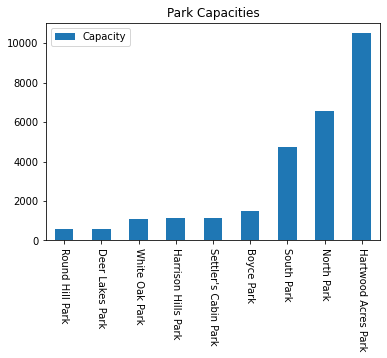

In [5]:
capacity = pd.DataFrame.from_dict(park_capacities, orient='index', columns=['Capacity']).sort_values(by='Capacity')
# Making a new dataframe with only park names and capacities.

capacity.plot(kind='bar', title='Park Capacities',rot=-90)

Looking at this bar graph, it is clear that Hartwood Acres Park has the highest capacity.

Next, a way to score each park by their capacity is needed in order to utilize this as a sub-metric. This will be done by giving each park a rating out of 10, calculated by...

In [7]:
scores = {}

for park in park_capacities:
    scores[park] = round(((park_capacities[park]*100)/10500.0), 1)

rankings = []
    
for entry in scores:
    rankings.append(scores[entry])

rankings.sort()
print(rankings)

[5.5, 5.6, 10.6, 10.8, 10.9, 14.4, 45.3, 62.6, 100.0]


In [ ]:
Find a dataset to narrow down the amount of neighborhoods to compare -> then add points from neighborhoods to 